In [82]:
import numpy as np 

# for sigmoid function expit()
import scipy.special

# neuralNetwork class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrates):

        # set number of nodes in each input, hidden and output layers
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, Wih and Who
        # weight inside the arrays are w_i_j, where link from nodes i to nodes j
    
        # the easy way
        # self.wih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (np.random.rand(self.onodes, self.hnodes) - 0.5)

        # 
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5)\
                                ,(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5)\
                                ,(self.onodes, self.hnodes))
        # learning rate
        self.lr = learningrates
        pass

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert list to 2d array 
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T

        # calculate the signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)

        # calculate the signals emerging from final out layer
        final_outputs = self.activation_function(final_inputs)        

        # Core of neural network
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin= 2).T

        # calculate the signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)

        # calculate the signals emerging from hidden layer
        hidden_output = self.activation_function(hidden_inputs)

        # calculate the signals into final output layer
        final_input = np.dot(self.who, hidden_output)
        
        # calculate the signals emerging from final out layer
        final_output = self.activation_function(final_input)
        return final_output

In [83]:
# start the mnist neural network
# set number of input, hidden and output nodes
import time 

input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.1

# create instance of neural networl
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist csv file to list
training_data_file = open(r'D:\GitHub\Neural-Network\mnist_dateset\mnist_train.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_list = training_data_list[1:]
training_data_file.close()

time_start = time.time()


# training the neural network 
# epochs is number of times the training data set is used for training
epochs = 5


for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')

        # scale the inputs range to [0.01, 0,99]
        inputs = ((np.asfarray(all_values[1:]) * 0.99 / 255) + 0.01)
        
        # set the targets
        # all_values[0] is the target label for this record
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99

        # train the neural network
        n.train(inputs, targets)
        pass
    pass

time_finish = time.time()
print('the training time cost is', time_finish-time_start)

the training time cost is 455.14046478271484


In [84]:
from matplotlib import pyplot as plt
%matplotlib inline 

# load the test data CSV file to the list
test_data_file = open(r'D:\GitHub\Neural-Network\mnist_dateset\mnist_test.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_list = test_data_list[1:]  # delet the 'label' row 
test_data_file.close()

# get the first value
# test_data_values = test_data_list[0].split(',')
# print the label
# print(test_data_values[0])

# show the data 
# image_array = np.asfarray(test_data_values[1:]).reshape((28,28))
# plt.imshow(image_array, cmap = 'Greys')

# test_1 = (np.asfarray(test_data_values[1:]) * 0.99 / 255) + 0.01
# n.query(test_1)

In [85]:
# test for how well the neural network preforms, initially empty
scorecard = []

# go through all the records in the data set
for record in test_data_list:
    # get the correct label
    all_values = record.split(',')
    correct_label = int(all_values[0])
    # print(correct_label, "correct label")
    
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) * 0.99 / 255) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    # print(label, "network's anwser")

    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass

    pass 

# print(scorecard)
# get the performance of the network
scorecard_array = np.asarray(scorecard)
print("performance is ", scorecard_array.sum()/ scorecard_array.size)

performance is  0.973


lable is 0
[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0

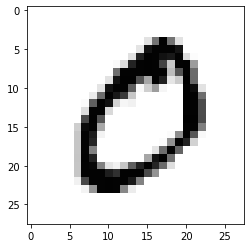

In [86]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

datefile = open(r'D:\GitHub\Neural-Network\mnist_dateset\mnist_train_100.csv', 'r')
datelist = datefile.readlines()
datefile.close()
len(datelist)
datelist[0]

allvalues = datelist[1].split(',')
print('lable is', allvalues[0])

image_array = np.asfarray(allvalues[1:]).reshape((28,28))
pyplot.imshow(image_array, cmap = 'Greys', interpolation= None)

# scale the input range to [0.01, 0,99]
scale_input = (np.asfarray(allvalues[1:]) * 0.99 / 255) + 0.01
print(scale_input) 

# output nodes is 10, set the out signal 
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(allvalues[0])] = 0.99  # notice that allvalues[0] is string


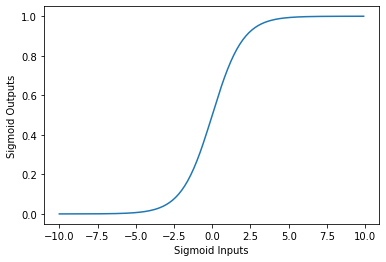

In [87]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))
%matplotlib inline 

sigmoid_inputs = np.arange(-10,10,00000.1)
sigmoid_outputs = sigmoid(sigmoid_inputs)

plt.plot(sigmoid_inputs,sigmoid_outputs)
plt.xlabel("Sigmoid Inputs")
plt.ylabel("Sigmoid Outputs")
plt.show()